<center>
<h1>UDST Bootcamp: Week 1</h1>
</center>

## Notation / Style Guide
To help make reading the code easier, the following style guide will be used for variable naming:


<center><strong>$var_dataset</strong></center>

var: Variable name, lowercase for a single element or vector and uppercase for a matrix

dataset: Will be one of {train, test, validation} indicating that the element(s) in var belong to this subset of the data

## Useful Functions & Tips

- `np.square(var)`: Square a variable, element-wise if the variable is a vector or matrix
- `np.sum(var, axis)`: Compute the sum of the elements of var. If var is a matrix, set axis=0 to sum the rows or axis=1 for columns
- `print(your_variable.shape)`: Use this if you're unsure of the dimensions of your variable. This will print a tuple  of the form (num rows, num columns)
- Slicing and Indexing: Best understood through a few examples. Note, if you're working with a dataframe use .iloc[ ]. If you're working with a numpy array, just use [ ] directly.
    - `X.iloc[:, :]` will select all elements in X, equivalent to just using X directly
    - `X.iloc[:, 6]` Selects the 7th column from X
    - `X.iloc[0, :]` Selects the 1st row from X
- `Counter(list).most_common(n)`: Returns an array of the n most common items in list as tuples of the form (item, frequency)

For more help, refer to the NumPy User Guide: https://docs.scipy.org/doc/numpy-1.10.0/user/index.html or reference: https://docs.scipy.org/doc/numpy-1.10.0/reference/index.html

## Imports

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

## Data Load and Prep

For this workbook, we'll be using the Iris flower species dataset from UCI: https://www.kaggle.com/uciml/iris/downloads/Iris.csv 

Make sure you download the .csv into a folder name data/ in the same directory as this workbook. First, let's store our paths so things don't break if things get moved around.

In [2]:
# CWD (Current Working Directory) is the directory this notebook is located
CWD = os.getcwd()
# Within CWD, create a sub-directory called data, to put your data in obviously.
DATA_DIR = os.path.join(os.getcwd(), 'data')
# Create another sub-directory called out, to put any plots or saved models
OUT_DIR = os.path.join(os.getcwd(), 'out')

Now let's import the data. We'll use pandas to read in the .csv file containing our data. Pandas stores data in an object called a DataFrame. We won't cover the details of the pandas library here but you can think of a DataFrame as a powerful extension of a Python dictionary - more can be read about it here:  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [3]:
dataset = pd.read_csv(os.path.join(DATA_DIR,'Iris.csv'))
type(dataset)

pandas.core.frame.DataFrame

We'll use head() and tail() to view the first and last 5 rows of our dataset respectively, so we know what we're working with.

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In statistics, it is common to generate a five-number summary to get a quick overview of your dataset. The five numbers are:

    1) Minimum
    2) First quartile 
    3) Median
    4) Third quartile
    5) Maximum
    
Pandas can provide these (along with some other for each feature in our dataset with one simple function call:

In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


This dataset only has 150 rows - very small! Also notice that the 'Species' column doesn't appear when you call describe() as the five-number summary doesn't make sense for a column of strings.

This dataset doesn't come with separate training and test data so we'll need to separate it ourselves. What percentage of the dataset goes to training and test depends on if you'll also be using a validation set. We won't use a validation set in this workbook so we'll use a common 70/30 split, with 70% of the data used for training and 30% for testing.

In [7]:
# Corresponds to 105 rows (rounded up)
TRAIN_PCNT = 0.7 
# Corresponds to 45 rows
TEST_PCNT = 0.3 

To build the training set, we'll want to randomly sample 105 rows from the dataset without replacement. The test set will then be whatever rows are left over.

In [8]:
train = dataset.sample(n=int(np.ceil(TRAIN_PCNT * dataset.shape[0])), replace=False)
test = dataset[~dataset.index.isin(train.index)]

In [9]:
print("Training Data Num Rows: {0}".format(train.shape[0]))
print("Test Data Num Rows: \t{0}".format(test.shape[0]))

Training Data Num Rows: 105
Test Data Num Rows: 	45


Let's regenerate the five-number summary for our training data. We won't do the same for our test data - you want to leave your test set untouched until the very end once you've trained and validated your model.

In [10]:
train.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,77.914286,5.879048,3.040000,3.886667,1.241905
std,42.182551,0.801044,0.450769,1.707510,0.723876
min,1.000000,4.400000,2.000000,1.200000,0.100000
25%,41.000000,5.100000,2.800000,1.700000,0.400000
50%,82.000000,5.800000,3.000000,4.400000,1.400000
75%,113.000000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


For this workbook, we're going to try to predict a flower's species using it's Sepal and Petal dimensions. This is a classifcation problem. To make things easier to read and work with, we'll split the training data into two dataframes: X_train and y_train. Recall from the notation above, X_train is a dataframe (matrix) containing the Sepal and Petal features and y_train is a dataframe (column) containing just the species column i.e. the target label.

In [11]:
X_train = train.drop('Species', axis=1)
y_train = train['Species']

X_test = test.drop('Species', axis=1)
y_test = test['Species']

In [12]:
X_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
110,111,6.5,3.2,5.1,2.0
112,113,6.8,3.0,5.5,2.1
114,115,5.8,2.8,5.1,2.4
11,12,4.8,3.4,1.6,0.2
15,16,5.7,4.4,1.5,0.4


In [13]:
y_train.head()

110    Iris-virginica
112    Iris-virginica
114    Iris-virginica
11        Iris-setosa
15        Iris-setosa
Name: Species, dtype: object

## Data Visualization

Now that we have our training data, what does it look like? Since our data has very few features, we can use the Seaborn library to generate a pairplot. The plot may seem a little overwhelming at first but it is not difficult to read and pretty powerful.

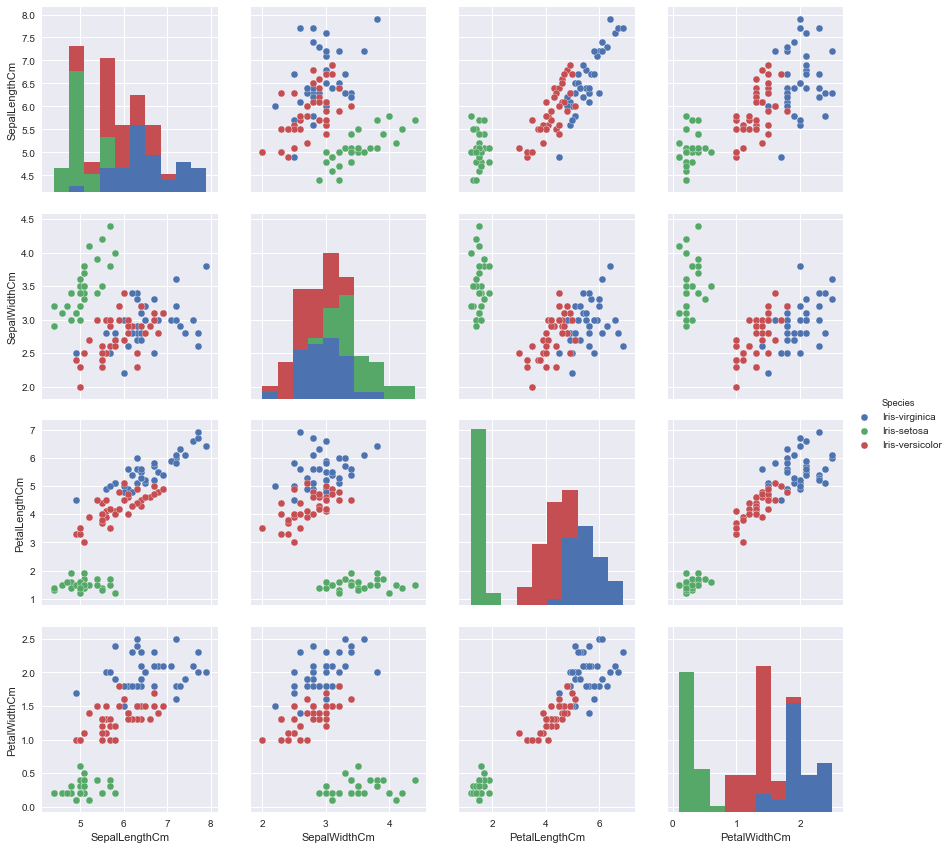

In [14]:
sns_plot = sns.pairplot(train.drop("Id", axis=1), hue="Species", size=3)

So what are we looking at? A pair plot, as the name suggests, generates a plot for every pair of features in a dataset and lays them out in a grid/matrix. For diagonal elements where the pair consists of identical features a histogram is plotted instead showing the distribution of values of that feature, color-coded by class label (in this case, Species). At a quick glance, we can see that the Iris-setosa species is significantly different from the others in each physical measurement.

Let's save this plot to our output directory:

In [15]:
sns_plot.savefig(os.path.join(OUT_DIR, "pairplot.png"))

## Distance Metrics

L1 Distance:

$$ d_1 = \sum_{i=0}^{D}| x_1 - x_2 | $$

In [16]:
def l1_norm(x1, x2):
    return np.sum(np.abs(x1-x2))

L2 Distance aka good ole Euclidean Distance:

$$ d_2 = \sqrt{(x_1 - x_2)^2} $$

If x1 and x2 are vectors of dimenion D, $$x_1, x_2 \in \mathbb{R}^D $$ then the distance becomes

$$ d_2 = \sqrt{\sum_{i=0}^{D}(x_1 - x_2)^2} $$

In [17]:
# def l2_norm(x1, x2):
#     distance = np.sqrt(np.sum(np.square(x1-x2)))
    # TODO: Delete the line below and implement the l2 norm using the l1 norm example above
    

The square root function is very expensive computationally. Since it is a monotonic function, we can do without it:

In [18]:
def l2_norm(x1, x2):
    # TODO: Get rid of the square root from your function above
    distance = np.sum(np.square(x1-x2))
    return distance

## Nearest neighbor
Given an input test datum and training data, assign a label to the test based on which point in the training data it is 'closest' to.

In [19]:
def nearest_neighbor(x_test, X_train):
    min_idx = 0
    distances = []

    for i in range(X_train.shape[0]):
        
        # TODO: Calculate the distance between the test vector 
        # and the current row in the dataset
        dist = l2_norm(X_train.iloc[i,:], x_test)
        
        distances.append(dist)
    
    # The row vector in X_train at min_idx is the data vector closest to x_test
    return X_train.iloc[distances.index(min(distances)), :]

Now let's test our nearest neighbor implementation

In [20]:
print("Input Test Vector:")
print(X_test.iloc[11, :])
print("Species: {0}".format(y_test.iloc[1]))

nn = nearest_neighbor(X_test.iloc[1, :], X_train)
print("\nNearest Neighbor: ")
print(nn)
print("Species: {0}".format(y_train.iloc[int(nn['Id'])]))

Input Test Vector:
Id               31.0
SepalLengthCm     4.8
SepalWidthCm      3.1
PetalLengthCm     1.6
PetalWidthCm      0.2
Name: 30, dtype: float64
Species: Iris-setosa

Nearest Neighbor: 
Id               4.0
SepalLengthCm    4.6
SepalWidthCm     3.1
PetalLengthCm    1.5
PetalWidthCm     0.2
Name: 3, dtype: float64
Species: Iris-setosa


It works!

## k-Nearest Neighbors
Let's extend the example from above. Generalize nearest neighbor to find the k nearest neighbors and return their index in the training data

In [21]:
def k_neighbors(x_test, X_train, k):
    distances = []
    
    for i in range(X_train.shape[0]):
        dist = l2_norm(x_test, X_train.iloc[i, :])
        # Store the distance, index pairs as tuples in our
        # distances array
        distances.append((dist, i))
    # This will sort the distances array from smallest to largest based
    # on the distance in the (distance, index) tuples
    distances = sorted(distances)
    
    # Return the indices of the nearest k neighbors
    return [i[1] for i in distances][:k]

Now, use the k-nearest neighbors to vote on the class label of our test vector:

In [22]:
def knn_predict(x_test, X_train, y_train, k):
    neighbors_idx = k_neighbors(x_test, X_train, k)
    labels = []
    
    for n in neighbors_idx:
        labels.append(y_train.iloc[n])
    
    # TODO: Return the most common label in labels
    
    most_common_label = Counter(labels).most_common(1)[0][0]
    return most_common_label
    

Finally, let's test our kNN implementation for k=5

In [23]:
print("Input Test Vector:")
print(X_test.iloc[40, :])
print("Species: {0}".format(y_test.iloc[40]))

nn = knn_predict(X_test.iloc[40, :], X_train, y_train, 5)
print("\nkNN Predicted Species: ")
print(nn)


Input Test Vector:
Id               142.0
SepalLengthCm      6.9
SepalWidthCm       3.1
PetalLengthCm      5.1
PetalWidthCm       2.3
Name: 141, dtype: float64
Species: Iris-virginica

kNN Predicted Species: 
Iris-virginica


Not too shabby.

## Loss Functions

Here we implement some of the loss functions discussed in lecture. 

The simplest loss is the mean squared error loss (MSE), which is just a simple extension of the l2 norm:

$$ L = MSE = \frac{1}{N}\sum_{i=0}^{N}(\hat{Y}_i - Y_i)^2 $$

Here, $\hat{Y}_i$ is the predicted label and $Y_i$ is the actual label in the dataset. Our goal is to minimize this function, and thus have accurate predictions. 

In [29]:
def loss_mse(y_pred, y):
    return (1 / y.shape[0]) * np.sum(np.square(y_pred - y))

The SVM loss is a little more involved and used for training classifiers as we will do later on for the Iris dataset. Here, we want to make sure that the score assigned to the correct class label is higher than every other (incorrect) label by at least some margin $\Delta$:

$$ L = \frac{1}{N} \sum_i \sum_{j\neq y_i} \left[ \max(0, f(x_i; W)_j - f(x_i; W)_{y_i} + \Delta) \right] $$

In [24]:
def loss_svm(x, y, W):
    delta = 1.0
    scores = W.dot(x)
    margins = np.maximum(0, scores - scores[y] + delta)
    margins[y] = 0
    return np.sum(margins) 

Now, let's implement the SVM loss but with L2 regularization:

$$ L = \frac{1}{N} \sum_i \sum_{j\neq y_i} \left[ \max(0, f(x_i; W)_j - f(x_i; W)_{y_i} + \Delta) \right] + \lambda \sum_k\sum_l W_{k,l}^2 $$

In [25]:
def loss_l2_svm(x, y, W, reg):
    reg_penalty = reg * np.sum(np.square(W))
    return loss_svm(x, y, W) + (0.5 * reg_penalty)

## Gradient Descent

Try playing around with the learning rate below and see the effect it has on your cost!

In [32]:
def gradientDescent(x, y, theta, alpha, m, numIterations): #ayy we descent now
    xTrans = x.transpose()
    J = []
    
    for i in range(0, numIterations):
        predicted = np.dot(x, theta)
        loss = predicted - y
        cost = 0.5 * loss_mse(predicted, y)
        
        J.append(cost)
        print("Iteration %d | Cost: %f" % (i, cost))
        
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta, J

In [33]:
x = np.matrix('1 2;1 4;1 6')
y = np.matrix('1;3;2')
theta = np.matrix('0;1')

In [34]:
theta, J = gradientDescent(x,y,theta,0.01,3,10)

Iteration 0 | Cost: 0.000000
Iteration 1 | Cost: 0.000000
Iteration 2 | Cost: 0.000000
Iteration 3 | Cost: 0.000000
Iteration 4 | Cost: 0.000000
Iteration 5 | Cost: 0.000000
Iteration 6 | Cost: 0.000000
Iteration 7 | Cost: 0.000000
Iteration 8 | Cost: 0.000000
Iteration 9 | Cost: 0.000000


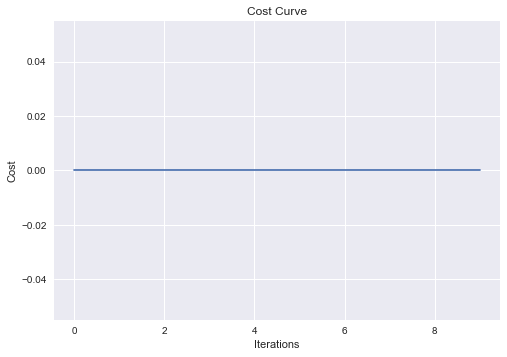

In [31]:
plt.plot(np.arange(0, 10, 1), J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Curve')
plt.savefig(os.path.join(OUT_DIR, 'cost.png'))

## Linear Regression

Since this dataset is used for classification, predicting the species of a flower will require a classification algorithm like kNN or logistic regression. However, our features are real-valued, and so we can try to see if there are any relationships between them. Let's take a look at the Sepal length and width for the Iris-setosa species:

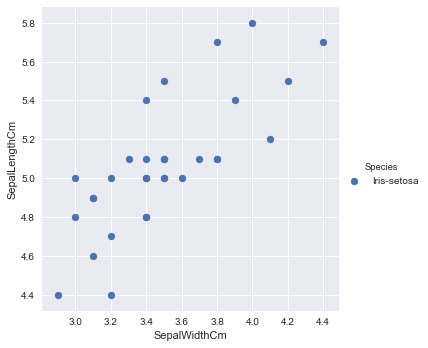

In [35]:
sns.FacetGrid(train.loc[train['Species'] == 'Iris-setosa'], hue="Species", size=5) \
   .map(plt.scatter, "SepalWidthCm", "SepalLengthCm") \
   .add_legend()

There appears to be some linear relationship between Sepal length and width for the Iris-setosa species. Can we quantitatively describe this relationship? In statistics, we would've used OLS or MLE to find the exact equation for the parameters $\theta_0$ and $\theta_1$ that describe a linear relationship:
$$ y = \theta_0 + \theta_1 x$$
Instead, let's try to determine the parameters using gradient descent - this will be a useful exercise to prepare us for when we can no longer find an analytic solution for the optimal parameters (i.e. neural networks).

For this, we'll create two functions - one to learn the parameters and another to make predictions. The reasons for this are twofold:
a) Clearly seperate the two main stages of machine learning
b) Many machine learning libraries, including the popular sklearn, are written in this fashion and so you can write model.fit() and model.predict() for any model of your choosing.

In [36]:
def linreg_fit(X, y, iters=1000, alpha=0.1):
    """
    NOTE: This is not a general multivariate linear regression implementation.
    Args:
        X - Training data features
        y - Training data corresponding labels
        iters - Number of iterations of gradient descent
        alpha - Learning rate
    Returns:
        theta - 2D vector containing theta_0 and theta_1
        J - the values of the cost function at each iteration
    """
    theta = np.zeros(shape=(2, 1))
    J = np.zeros(shape=(iters, 1))
    n = y.size
    
    b = np.ones((X.shape[0],))
   
    X = np.stack((b, X), axis=1)
   
    for i in range(iters):
        predicted = np.dot(X, theta)

        err_0 = (predicted[:, 0] - y) * X[:, 0]
        
        err_1 = (predicted[:, 0] - y) * X[:, 1]

        # Update parameters based on computed gradient
        theta[0][0] = theta[0][0] - alpha * (1.0 / n) * err_0.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / n) * err_1.sum()

        J[i, 0] = 0.5 * loss_mse(predicted[:, 0], y)

    return theta, J

In [37]:
def linreg_predict(X_test, theta):
    return theta[0, :] + np.dot(X_test, theta[1, 0]) 

Now, let's test our linear regression. First let's get the data we need:

In [38]:
X_train_linreg = train.loc[train['Species'] == 'Iris-setosa']['SepalWidthCm']
y_train_linreg = train.loc[train['Species'] == 'Iris-setosa']['SepalLengthCm']

In [39]:
theta, J = linreg_fit(X_train_linreg, y_train_linreg)
print(theta)

[[ 1.77400456]
 [ 0.94139603]]


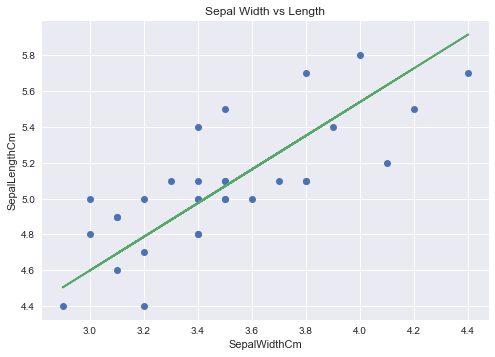

In [40]:
y = linreg_predict(X_train_linreg, theta)
plt.plot(X_train_linreg, y_train_linreg, 'o', X_train_linreg, y)
plt.xlabel('SepalWidthCm')
plt.ylabel('SepalLengthCm')
plt.title('Sepal Width vs Length')

## Survey!

Please fill this out, your feedback is greatly appreciated! https://docs.google.com/forms/d/e/1FAIpQLSdjf3uXd8u96v8Z5l5jazvyRmfyPqJXS_2xORFQZ11JQWRSNg/viewform

## Logistic Regression

$$ f(z) = \frac{1}{1 + \mathrm{e}^{-z}} $$

In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [42]:
def logistic_regr(X, y, n, alpha):
    """
    Args:
        X - training data features
        y - training data target labels
        n - number of iterations of gradient descent
        alpha - learning rate
    Returns:
        w - learned weights
    """
    
    # Let's add a row of ones to the training data features
    # That way we don't have to keep track of the b vector separately
    b = np.ones((X.shape[0], 1))
    X = np.stack((b, X), axis=1)
    
    w = np.zeros(X.shape[1])
    
    for i in xrange(n):
        
        predicted = sigmoid(np.dot(X, w))
        
        loss = l2_norm(predicted, y)
        
        grad = np.dot(X.T, loss)
        
        w += alpha * gradient
        
    print("Learned weights: \t{0}".format(w))
    return w